In [1]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
# #!pip install plotly
# import plotly
# import plotly.graph_objs as go

from matplotlib.colors import ListedColormap

How big dataset?

In [3]:
n_rows = int(1e3) #10M rows
n_columns = int(100)


In [4]:
df = make_classification(n_samples=n_rows, 
                         n_features=n_columns,
                         n_classes=2, 
                         n_informative=int(n_columns/5),
#                          class_sep = 1.0,
                         random_state=np.random.RandomState(43210))



    
pd_df = pd.DataFrame(df[0],columns=['x'+str(i) for i in range(1,n_columns+1)])
pd_df['y'] = df[1]
print(pd_df.head())

         x1        x2        x3        x4        x5        x6        x7  \
0  0.717653  0.141720  0.211203 -1.300297  1.058207  0.740528  1.183774   
1  1.418792  0.861971  1.841032 -0.702045  0.399653  1.755373 -0.784266   
2 -1.091515  0.192352  1.724200 -0.738057 -0.445201 -2.400388  1.741731   
3 -1.303321 -2.478048  0.444669  0.264406  0.754522  0.081265 -0.582652   
4  0.444488  0.854118  0.026966 -0.812156  0.256020 -0.574139 -0.156866   

         x8        x9       x10  ...       x92       x93       x94       x95  \
0  0.865949 -0.426971 -0.996183  ... -1.882126 -1.331247  1.088436  0.014608   
1  0.178598  0.583410 -1.131097  ...  2.562386  0.473554  2.319495 -0.459220   
2  0.896653 -0.018584  1.939712  ...  1.268970 -0.151813  3.230725 -1.473771   
3  0.440826  0.499219  0.274532  ...  0.673095  2.345189 -2.051314  1.831589   
4  1.503694 -1.239469 -0.399878  ... -2.809960 -0.620435  4.897657 -1.138419   

        x96       x97       x98       x99      x100  y  
0 -1.571862

###  1. Train / Test split 

In [5]:
X, y = df[0],df[1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
type(y_train)

numpy.ndarray

Check dimensions

In [8]:

print('X_train: ', X_train.shape, X_train.dtype, 'y_train: ', y_train.shape, y_train.dtype)
print('X_validation', X_test.shape, X_test.dtype, 'y_test: ', y_test.shape, y_test.dtype)

X_train:  (800, 100) float64 y_train:  (800,) int64
X_validation (200, 100) float64 y_test:  (200,) int64


Write the dataset to disk as csv so that we can demontrate data loading.

In [9]:
%%time
pd.DataFrame(data = X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(data = X_test).to_csv('X_test.csv',index=False)
pd.DataFrame(data = y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(data = y_test).to_csv('y_test.csv',index=False)

CPU times: user 176 ms, sys: 3.05 ms, total: 180 ms
Wall time: 178 ms


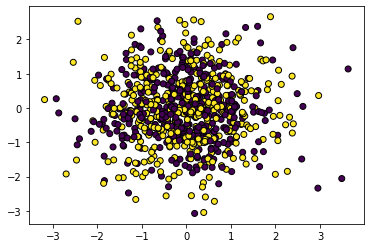

In [10]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cm_bright,edgecolors='k')
cm_bright = ListedColormap(['#FF00FF', '#00FF00'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,edgecolors='k')

In [11]:
# https://github.com/rapidsai/notebooks-contrib/blob/master/getting_started_notebooks/intro_tutorials/07_Introduction_to_XGBoost.ipynb